In [1]:
!pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 8.4 MB/s eta 0:00:00


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.9 MB/s eta 0:00:00


In [17]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
langsmith=userdata.get('LANGSMITH_API_KEY')
print(langsmith)
print(groq_api_key)


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
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


In [18]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [19]:
from langchain_groq import ChatGroq

In [20]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7979f4372550>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7979f46973d0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [21]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

## Start Building Chatbot using LangGraph

In [22]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)


In [23]:
graph_builder

In [24]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [25]:
graph_builder.add_node("chatbot",chatbot)

In [26]:
graph_builder

In [27]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [28]:
graph=graph_builder.compile()

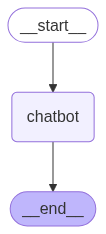

In [29]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [30]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: hello what you can do ?
dict_values([{'messages': AIMessage(content='Hello! I am Gemma, an open-weights AI assistant. I can do many things, including:\n\n* **Generating creative content:**\n\nI can write stories, poems, articles, and even code.\n\n* **Answering your questions:** I have been trained on a massive dataset of text and code, so I can provide informative answers to a wide range of questions.\n\n* **Summarizing text:** Give me a long piece of writing and I can condense it into a shorter summary.\n* **Translating languages:** I can translate text between multiple languages.\n* **Engaging in conversation:** I can chat with you about various topics and try my best to be helpful and entertaining.\n\nWhat can I do for you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 153, 'prompt_tokens': 15, 'total_tokens': 168, 'completion_time': 0.278181818, 'prompt_time': 0.001843878, 'queue_time': 0.10776466400000001, 'total_time': 0.280025696}